In [11]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
!kaggle datasets download -d fatemehmehrparvar/lung-disease

 95% 33.0M/34.9M [00:00<00:00, 60.4MB/s]
100% 34.9M/34.9M [00:00<00:00, 61.0MB/s]


In [13]:
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!unzip /content/lung-disease.zip

Archive:  /content/lung-disease.zip
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/10.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/100.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1000.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1001.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1002.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1003.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1004.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1005.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1006.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1007.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1008.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/Lung_Opacity/1009.jpg  
  inflating: Lung X-Ray Image/Lung X-Ray Image/

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
data_path  = "/content/LungImage/images"
image_size = (256, 256)
batch_size = 32

In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    validation_split=0.1
)


In [20]:
train_data = datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

valid_data = datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 3128 images belonging to 3 classes.
Found 347 images belonging to 3 classes.


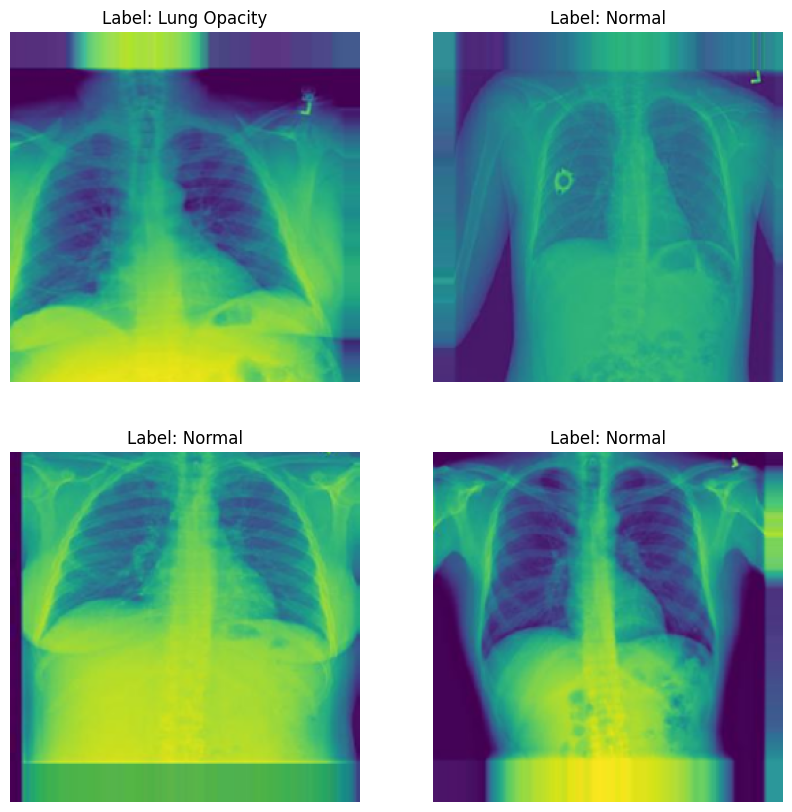

In [21]:
titles = ["Lung Opacity", "Normal", "Viral Pneumonia"]
images, labels = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {titles[labels[i].argmax()]}')
    plt.axis('off')
plt.show()

In [22]:
from tensorflow import keras

In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, input_shape=(256, 256, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(512, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      2

In [26]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [27]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
history = model.fit(train_data, epochs=10, validation_data=valid_data,  callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/10
98/98 [==============================] - 104s 1s/step - loss: 0.6129 - accuracy: 0.7676 - val_loss: 1.8923 - val_accuracy: 0.3228
Epoch 2/10
98/98 [==============================] - 101s 1s/step - loss: 0.4516 - accuracy: 0.8159 - val_loss: 1.8967 - val_accuracy: 0.3228
Epoch 3/10
98/98 [==============================] - 100s 1s/step - loss: 0.4039 - accuracy: 0.8350 - val_loss: 1.9716 - val_accuracy: 0.3228


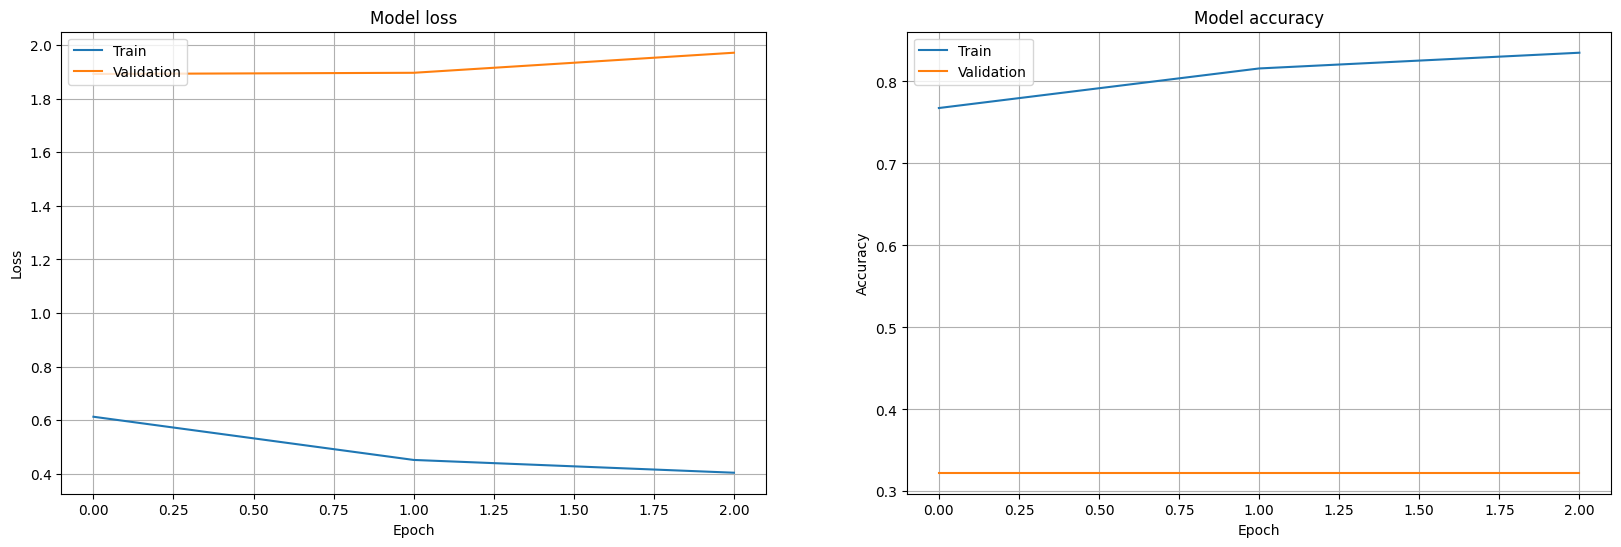

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [40]:
base_model = keras.applications.InceptionV3(weights='imagenet', include_top=False,  input_shape=(256, 256, 3))

In [51]:
new_model = keras.Sequential()
new_model.add(base_model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(512, activation='relu'))
new_model.add(keras.layers.Dropout(0.5))
new_model.add(keras.layers.Dense(3, activation='softmax'))

In [52]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 73728)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               37749248  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 59553571 (227.18 MB)
Trainable params: 59519139 (227.05 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [53]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [54]:
new_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [55]:
history = new_model.fit(train_data, epochs=10, validation_data=valid_data,  callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/10
98/98 [==============================] - 198s 2s/step - loss: 0.5104 - accuracy: 0.8405 - val_loss: 0.3941 - val_accuracy: 0.8271
Epoch 2/10
98/98 [==============================] - 177s 2s/step - loss: 0.4145 - accuracy: 0.8894 - val_loss: 0.2673 - val_accuracy: 0.8963
Epoch 3/10
98/98 [==============================] - 178s 2s/step - loss: 0.2560 - accuracy: 0.9047 - val_loss: 0.2868 - val_accuracy: 0.8991
Epoch 4/10
98/98 [==============================] - 177s 2s/step - loss: 0.3773 - accuracy: 0.9191 - val_loss: 0.2584 - val_accuracy: 0.9107
Epoch 5/10
98/98 [==============================] - 177s 2s/step - loss: 0.3268 - accuracy: 0.9178 - val_loss: 0.2345 - val_accuracy: 0.9078
Epoch 6/10
98/98 [==============================] - 176s 2s/step - loss: 0.3109 - accuracy: 0.9271 - val_loss: 0.2626 - val_accuracy: 0.8876
Epoch 7/10
98/98 [==============================] - 175s 2s/step - loss: 0.2421 - accuracy: 0.9332 - val_loss: 0.3047 - val_accuracy: 0.8876


In [59]:
loss, accuracy = new_model.evaluate(valid_data)

11/11 [==============================] - 6s 502ms/step - loss: 0.3292 - accuracy: 0.8963


In [60]:
print(f"Loss = {round(loss*100, 2)}%")
print(f"Accuracy = {round(accuracy*100, 2)}%")

Loss = 32.92%
Accuracy = 89.63%


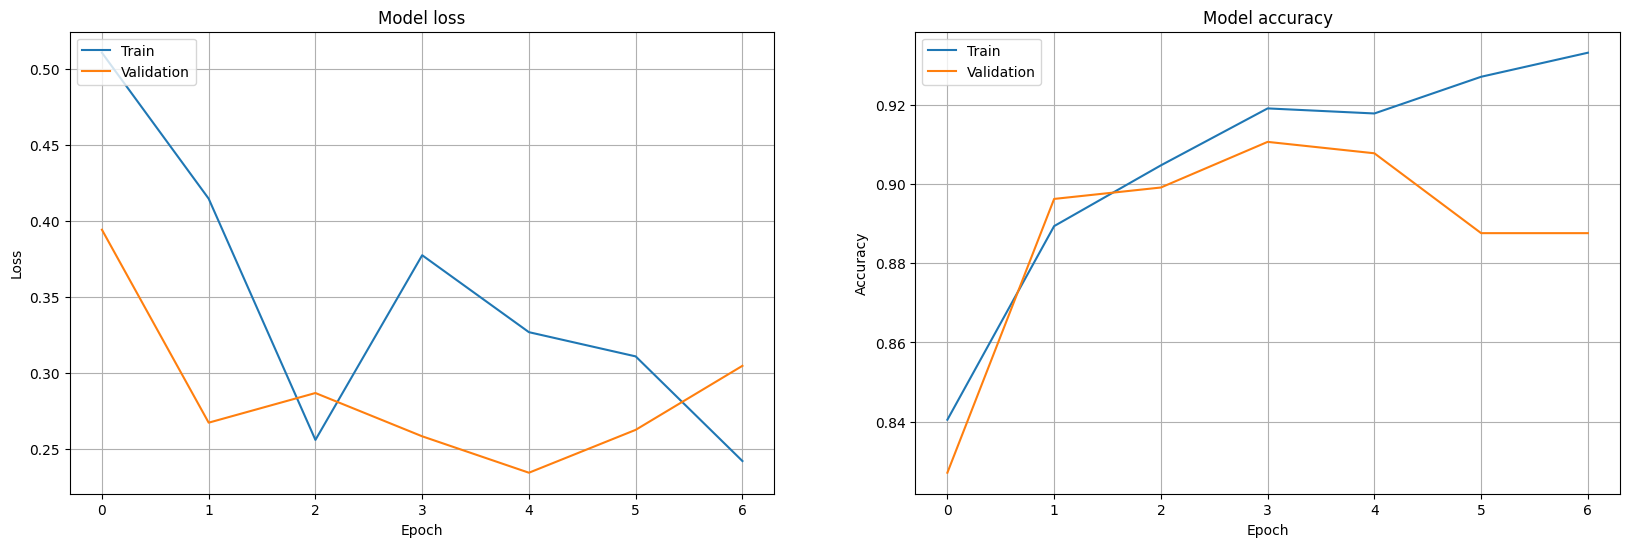

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [57]:
new_model.save("lung_image.keras")